In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [12]:
 X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [13]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.393746,-2.590816,-0.358461,-3.412252,2.308180,0
1,1.033660,-0.699371,0.602694,-0.654660,0.934170,0
2,-0.618240,0.059428,2.330326,1.414267,-1.517582,1
3,-2.389074,0.126106,0.929490,-2.113598,-0.301158,1
4,-2.682504,0.484611,0.647601,-2.554535,1.633877,1


In [14]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [18]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [19]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [20]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12124\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Admin\AppData\Local\Temp\ipykernel_12124\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Admin\AppData\Local\Temp\ipykernel_12124\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [21]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col3', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')
Index(['col2', 'col1', 'target'], dtype='object')


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [23]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [24]:
from sklearn.tree import plot_tree

[Text(0.4230769230769231, 0.9375, 'x[0] <= -0.53\ngini = 0.493\nsamples = 50\nvalue = [22, 28]'),
 Text(0.15384615384615385, 0.8125, 'x[1] <= -0.103\ngini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.07692307692307693, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.6875, 'x[0] <= -1.973\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.15384615384615385, 0.5625, 'x[0] <= -2.113\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.07692307692307693, 0.4375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.23076923076923078, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.5625, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.6923076923076923, 0.8125, 'x[1] <= 1.362\ngini = 0.408\nsamples = 28\nvalue = [20, 8]'),
 Text(0.6153846153846154, 0.6875, 'x[1] <= 0.25\ngini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(0.46153846153846156, 0.5625, 'x[0] <= -0.063\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),


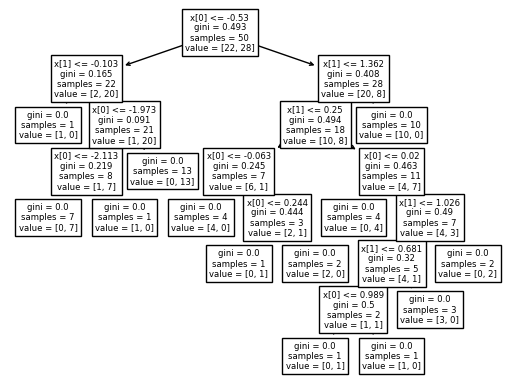

In [25]:
plot_tree(clf1)

[Text(0.2857142857142857, 0.95, 'x[1] <= -1.549\ngini = 0.449\nsamples = 50\nvalue = [33, 17]'),
 Text(0.14285714285714285, 0.85, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.42857142857142855, 0.85, 'x[0] <= -1.255\ngini = 0.498\nsamples = 32\nvalue = [15, 17]'),
 Text(0.2857142857142857, 0.75, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5714285714285714, 0.75, 'x[0] <= -0.883\ngini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(0.42857142857142855, 0.65, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.7142857142857143, 0.65, 'x[1] <= 0.49\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.5714285714285714, 0.55, 'x[0] <= 0.813\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.42857142857142855, 0.45, 'x[0] <= -0.548\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.2857142857142857, 0.35, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5714285714285714, 0.35, 'x[1] <= -0.72\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.4285714285714

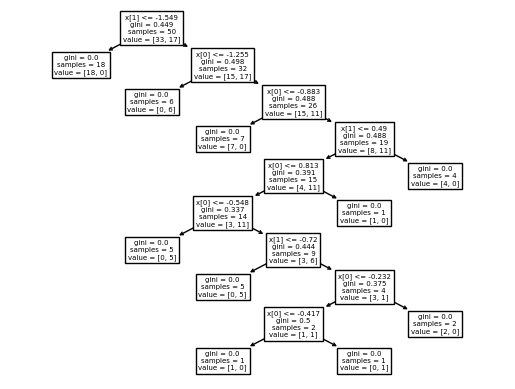

In [26]:
plot_tree(clf2)

[Text(0.5555555555555556, 0.9444444444444444, 'x[1] <= -0.53\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.3333333333333333, 0.8333333333333334, 'x[0] <= -1.48\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.2222222222222222, 0.7222222222222222, 'x[1] <= -2.182\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.1111111111111111, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.7222222222222222, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.7777777777777778, 0.8333333333333334, 'x[1] <= 1.449\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(0.6666666666666666, 0.7222222222222222, 'x[1] <= -0.088\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.5555555555555556, 0.6111111111111112, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7777777777777778, 0.6111111111111112, 'x[0] <= -0.91\ngini = 0.492\nsamples = 16\nvalu

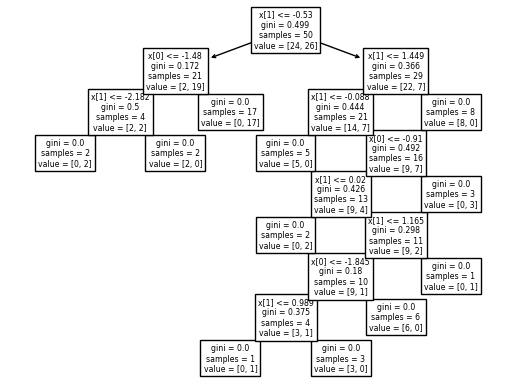

In [27]:

plot_tree(clf3)

In [29]:
print(clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2)))
print(clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2)))
print(clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2)))

[1]
[0]
[1]


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
def test(df1,df2,df3,row,col):
    print(df1.columns)
    print(df2.columns)
    print(df3.columns)
    
    clf1 = DecisionTreeClassifier()
    clf2 = DecisionTreeClassifier()
    clf3 = DecisionTreeClassifier()
    
    
    
    clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
    clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
    clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])
    
    